In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [30]:
files = os.listdir()
labels=[]
ids = []
for file in files:
    if "txt" in file:
        with open(file,'r') as f:
            lines = f.readlines()
            for line in lines:
                building_id = line.strip().split(",")[0]
                ids.append(building_id)
                label = int(line.strip().split(",")[1])
                labels.append(label)

In [31]:
df = None
for file in files:
    if "csv" in file:
        if df==None:
            df=pd.read_csv(file)
        else:
            df = pd.concat([df,pd.read_csv(file) ], axis=0, ignore_index=True)
df = df.drop(axis=1,columns=df.columns[0])

In [33]:
df.columns

Index(['id', 'type', 'lod', 'point_count', 'unique_point_count',
       'surface_count', 'actual_volume', 'convex_hull_volume', 'obb_volume',
       'aabb_volume', 'footprint_perimeter', 'obb_width', 'obb_length',
       'surface_area', 'ground_area', 'wall_area', 'roof_area',
       'ground_point_count', 'wall_point_count', 'roof_point_count',
       'ground_surface-count', 'wall_surface_count', 'roof_surface_count',
       'max_Z', 'min_Z', 'height_range', 'mean_Z', 'median_Z', 'std_Z',
       'mode_Z', 'ground_Z', 'orientation_values', 'orientation_edges',
       '2d_grid_point_count', '3d_grid_point_count', 'circularity_2d',
       'hemisphericality_3d', 'convexity_2d', 'convexity_3d', 'fractality_2d',
       'fractality_3d', 'rectangularity_2d', 'rectangularity_3d',
       'squareness_2d', 'cubeness_3d', 'horizontal_elongation',
       'min_vertical_elongation', 'max_vertical_elongation', 'form_factor_3D',
       'equivalent_rectangularity_index_2d', 'equivalent_prism_index_3d',
 

In [32]:
df.head()


,id,type,lod,point_count,unique_point_count,surface_count,actual_volume,convex_hull_volume,obb_volume,aabb_volume,...,roughness_index_2d,roughness_index_3d,shared_walls_area,N_count,Unnamed: 0,co_id,geometry,buffered_geometry,N_direct,N_direct_area
0,DEBY_LOD2_4826699,Building,2,24,8,6,87.936473,87.936473,89.878614,106.208520,...,0.943609,0.952566,0,3.0,0.0,DEBY_LOD2_4826699,POLYGON Z ((689043.834 5334685.034999999 525.9...,"POLYGON ((689043.7347622485 5334685.022676499,...",1.0,0.401658
1,DEBY_LOD2_4865432,Building,2,42,14,9,227.866659,228.161846,249.520908,548.036211,...,0.832724,1.218115,0,8.0,1.0,DEBY_LOD2_4865432,"POLYGON Z ((689408.969 5335993.67 520.359, 689...","POLYGON ((689409.0250278546 5335993.752902201,...",1.0,0.574651
2,DEBY_LOD2_4826839,Building,2,24,8,6,82.474957,82.474957,84.493031,99.857134,...,0.845140,1.209680,0,0.0,2.0,DEBY_LOD2_4826839,"POLYGON Z ((688226.474 5334881.772 524.629, 68...","POLYGON ((688226.4671122679 5334881.871762513,...",0.0,0.000000
3,DEBY_LOD2_4864131,Building,2,24,8,6,14.512009,14.512009,14.542669,16.707814,...,1.068064,1.137201,0,0.0,3.0,DEBY_LOD2_4864131,"POLYGON Z ((689915.577 5335235.3 520.609, 6899...","POLYGON ((689915.4772515664 5335235.292911279,...",0.0,0.000000
4,DEBY_LOD2_4864804,Building,2,226,75,40,36592.680960,47270.712790,58012.031570,84078.226800,...,0.614778,1.026613,0,48.0,4.0,DEBY_LOD2_4864804,POLYGON Z ((689886.089 5335715.489999999 521.6...,"POLYGON ((689886.1800225009 5335715.448588596,...",5.0,13.424814


In [5]:
data_label = pd.DataFrame({'building_id':ids,"labels":labels})
data_label = data_label.loc[(data_label['labels'] != 0) & (data_label['labels'] != -1) &(data_label['labels']<=15) ]
data_label.head()

,building_id,labels
0,DEBY_LOD2_104221639,6
4,DEBY_LOD2_104572574,5
5,DEBY_LOD2_104572575,5
6,DEBY_LOD2_104572576,8
7,DEBY_LOD2_104572697,5


In [6]:
data=pd.merge(data_label,df,left_on="building_id",right_on="id")
data.head()

,building_id,labels,id,type,lod,point_count,unique_point_count,surface_count,actual_volume,convex_hull_volume,...,roughness_index_2d,roughness_index_3d,shared_walls_area,N_count,Unnamed: 0,co_id,geometry,buffered_geometry,N_direct,N_direct_area
0,DEBY_LOD2_104221639,6,DEBY_LOD2_104221639,Building,2,78,25,16,3399.450342,3634.872808,...,0.810691,0.857308,0,56.0,8444.0,DEBY_LOD2_104221639,POLYGON Z ((690065.292 5334641.182999999 519.6...,"POLYGON ((690065.1920027778 5334641.182247043,...",4.0,1.894878
1,DEBY_LOD2_104221639,4,DEBY_LOD2_104221639,Building,2,78,25,16,3399.450342,3634.872808,...,0.810691,0.857308,0,56.0,8444.0,DEBY_LOD2_104221639,POLYGON Z ((690065.292 5334641.182999999 519.6...,"POLYGON ((690065.1920027778 5334641.182247043,...",4.0,1.894878
2,DEBY_LOD2_104221639,3,DEBY_LOD2_104221639,Building,2,78,25,16,3399.450342,3634.872808,...,0.810691,0.857308,0,56.0,8444.0,DEBY_LOD2_104221639,POLYGON Z ((690065.292 5334641.182999999 519.6...,"POLYGON ((690065.1920027778 5334641.182247043,...",4.0,1.894878
3,DEBY_LOD2_104572574,5,DEBY_LOD2_104572574,Building,2,202,58,45,4671.623248,5257.287218,...,0.749229,0.808446,0,71.0,2339.0,DEBY_LOD2_104572574,"POLYGON Z ((689977.349 5335776.63 519.33, 6899...","POLYGON ((689960.971820037 5335775.8631686885,...",2.0,2.613956
4,DEBY_LOD2_104572574,3,DEBY_LOD2_104572574,Building,2,202,58,45,4671.623248,5257.287218,...,0.749229,0.808446,0,71.0,2339.0,DEBY_LOD2_104572574,"POLYGON Z ((689977.349 5335776.63 519.33, 6899...","POLYGON ((689960.971820037 5335775.8631686885,...",2.0,2.613956


792


<Axes: >

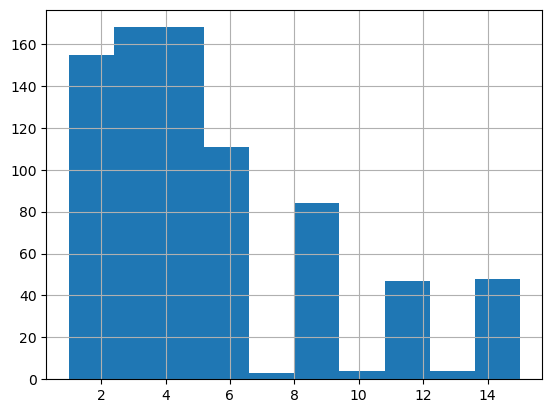

In [7]:
print(len(data))
# only on munich
data = data.interpolate(method="linear")
data["labels"].hist()


# without data argumentation

In [8]:
columns = list(data.columns)
for col in ["co_id","id","building_id","lod","type",'orientation_values', 'orientation_edges',"Unnamed: 0","geometry","buffered_geometry","labels"]:
    columns.remove(col)

In [9]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = data["labels"].values.reshape(-1,1)

x = data[columns].values


oversampler = RandomOverSampler()
x, y = oversampler.fit_resample(x, y)
scaler = StandardScaler()
y= y.reshape(-1,1)
# Fit the scaler to your data and transform it
X = scaler.fit_transform(x)
Y = scaler.fit_transform(y)

In [10]:
# all are munich and the train-test split ratio is 2:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train.shape,X_test.shape

((1575, 68), (777, 68))

/Users/asdfasd/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.69      0.88      0.78        43
           2       0.71      0.55      0.62        66
           3       0.47      0.40      0.43        68
           4       0.65      0.56      0.60        62
           5       0.79      0.66      0.72        67
           6       0.68      0.75      0.71        53
           7       1.00      0.97      0.98        66
           8       0.67      0.64      0.66        59
           9       0.91      0.82      0.87        51
          10       1.00      1.00      1.00        54
          11       0.91      0.83      0.86        58
          12       0.80      0.87      0.83        52
          13       0.77      1.00      0.87        43
          15       0.53      0.89      0.66        35

    accuracy                           0.75       777
   macro avg       0.75      0.77      0.76       777
weighted avg       0.76      0.75      0.75       777



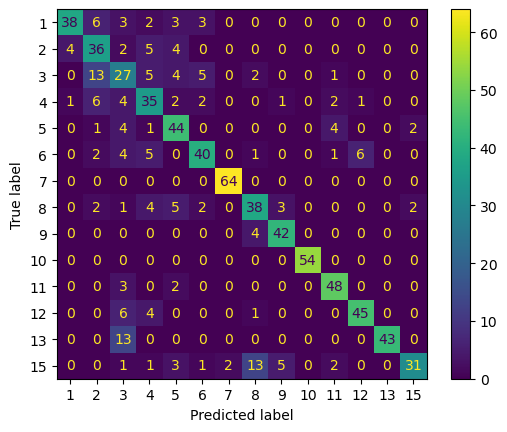

In [12]:
from sklearn import svm
clf = svm.NuSVC(gamma=0.05)
clf.fit(X_train, y_train)
from sklearn.metrics import classification_report
pred_y = clf.predict(X_test)
report = classification_report(pred_y,y_test)
print(report)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

/Users/asdfasd/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.84      0.90      0.87        51
           2       0.94      0.96      0.95        50
           3       0.77      0.75      0.76        59
           4       0.87      0.81      0.84        58
           5       0.86      0.83      0.84        58
           6       0.76      0.90      0.83        50
           7       1.00      1.00      1.00        64
           8       0.95      0.87      0.91        62
           9       1.00      0.98      0.99        47
          10       1.00      1.00      1.00        54
          11       1.00      0.91      0.95        58
          12       1.00      0.92      0.96        61
          13       1.00      1.00      1.00        56
          15       0.80      0.96      0.87        49

    accuracy                           0.91       777
   macro avg       0.91      0.91      0.91       777
weighted avg       0.92      0.91      0.91       777



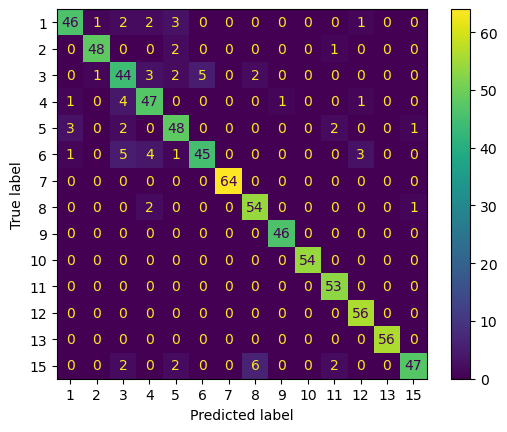

In [14]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
report = classification_report(pred_y,y_test)
print(report)
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

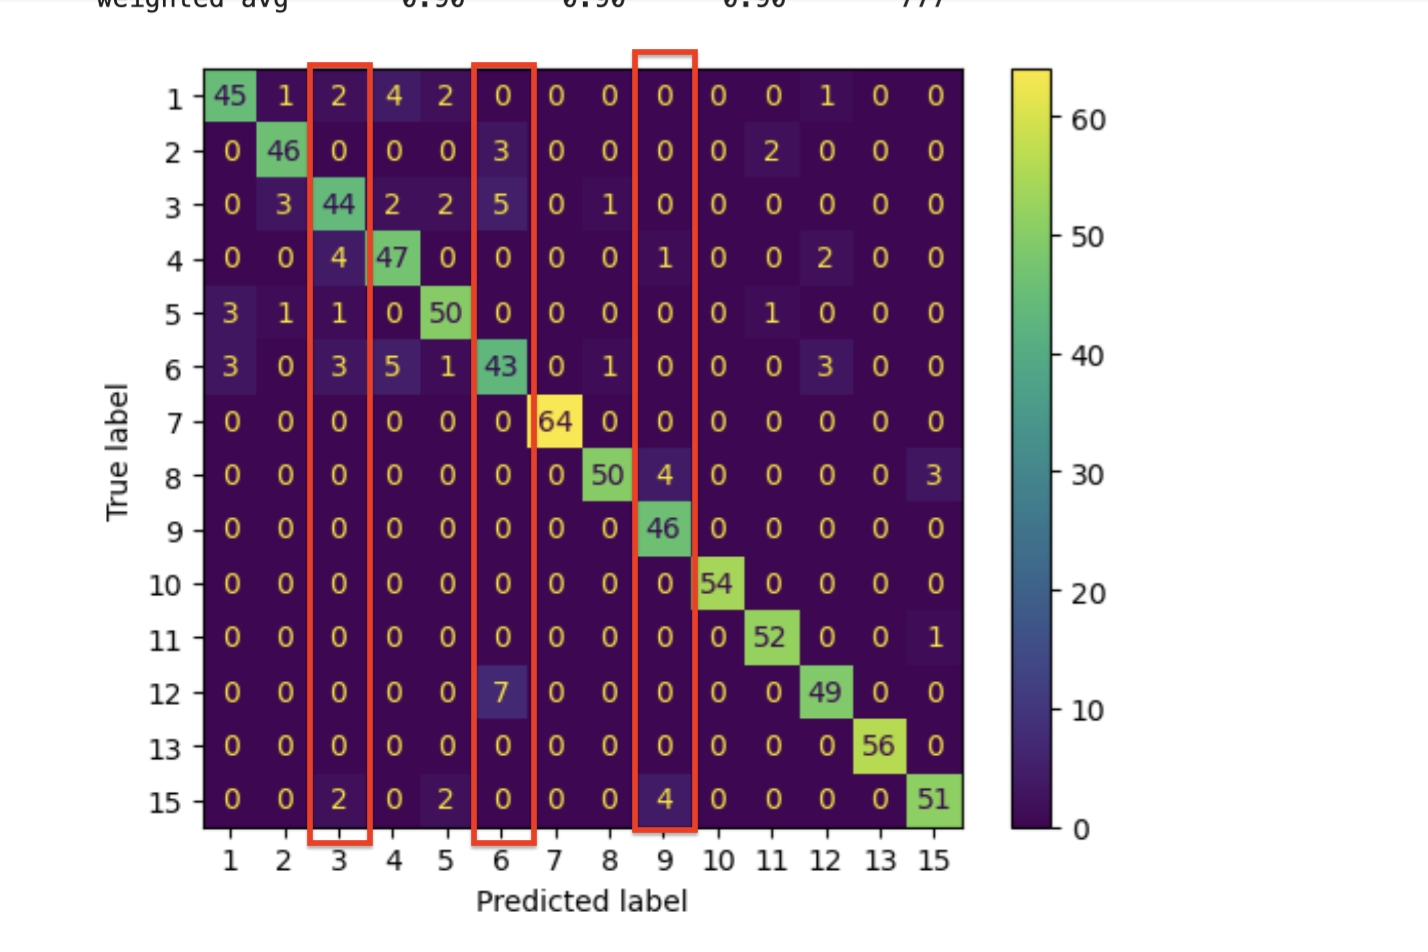

In [15]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)


In [16]:
sorted_importances_idx = result.importances_mean.argsort()

importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=np.array(columns)[sorted_importances_idx],
)
importances.head(15)

,proximity_index_2d_,circularity_2d,2d_grid_point_count,roof_area,std_Z,spin_index_2d,unique_point_count,roof_point_count,roof_surface_count,girth_index_3d,...,footprint_perimeter,median_Z,surface_count,horizontal_elongation,rectangularity_2d,convexity_3d,N_count,N_direct_area,form_factor_3D,mean_Z
0,-0.009009,-0.001287,-0.003861,-0.003861,-0.005148,-0.002574,-0.003861,-0.002574,0.001287,-0.003861,...,0.007722,0.021879,0.024453,0.024453,0.028314,0.038610,0.033462,0.043758,0.045045,0.037323
1,-0.003861,-0.006435,-0.002574,-0.005148,-0.002574,0.000000,-0.003861,-0.002574,0.002574,0.002574,...,0.021879,0.021879,0.020592,0.018018,0.039897,0.037323,0.030888,0.042471,0.038610,0.048906
2,-0.005148,-0.005148,-0.002574,-0.003861,0.001287,-0.006435,-0.002574,-0.001287,0.000000,0.000000,...,0.019305,0.020592,0.019305,0.030888,0.027027,0.034749,0.041184,0.042471,0.032175,0.041184
3,-0.002574,-0.003861,-0.001287,-0.002574,0.002574,-0.002574,0.000000,-0.001287,-0.001287,-0.001287,...,0.014157,0.010296,0.027027,0.036036,0.037323,0.041184,0.043758,0.042471,0.043758,0.043758
4,-0.003861,-0.002574,-0.002574,0.001287,0.005148,-0.002574,0.001287,0.000000,0.000000,0.002574,...,0.020592,0.020592,0.018018,0.018018,0.036036,0.038610,0.036036,0.042471,0.036036,0.043758
5,-0.002574,0.002574,-0.003861,0.000000,-0.010296,-0.005148,0.001287,0.000000,-0.002574,-0.002574,...,0.015444,0.019305,0.018018,0.021879,0.025740,0.036036,0.045045,0.032175,0.042471,0.047619
6,-0.002574,0.000000,-0.003861,-0.003861,-0.009009,-0.002574,-0.001287,-0.002574,-0.002574,0.001287,...,0.012870,0.024453,0.025740,0.020592,0.036036,0.043758,0.043758,0.032175,0.036036,0.042471
7,0.000000,-0.005148,-0.002574,-0.001287,-0.003861,0.000000,-0.001287,-0.002574,-0.002574,-0.001287,...,0.009009,0.018018,0.020592,0.024453,0.032175,0.027027,0.043758,0.042471,0.038610,0.048906
8,0.000000,-0.007722,-0.003861,-0.005148,-0.001287,0.000000,-0.002574,0.001287,-0.002574,-0.005148,...,0.015444,0.019305,0.012870,0.014157,0.030888,0.042471,0.034749,0.038610,0.050193,0.037323
9,-0.006435,-0.001287,-0.001287,-0.002574,-0.002574,-0.003861,-0.001287,-0.001287,-0.002574,-0.001287,...,0.007722,0.012870,0.019305,0.030888,0.039897,0.039897,0.036036,0.033462,0.038610,0.038610


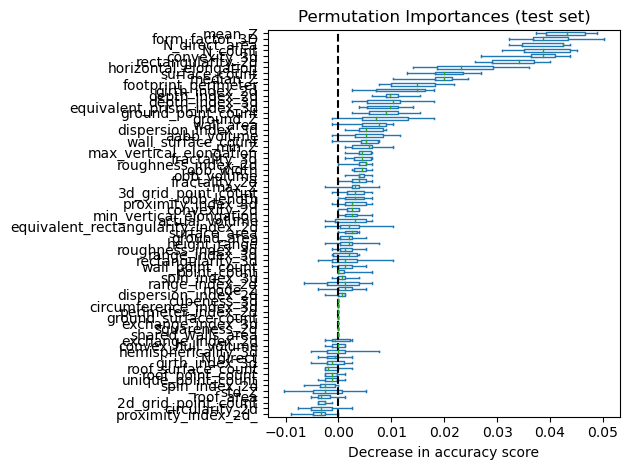

In [17]:
ax = importances.plot.box(vert=False, whis=50)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# dimensionality reduction

In [18]:
columns = np.array(columns)[result.importances_mean>0]

In [19]:
y = data["labels"].values.reshape(-1,1)

x = data[columns].values


oversampler = RandomOverSampler()
x, y = oversampler.fit_resample(x, y)
scaler = StandardScaler()
y= y.reshape(-1,1)
# Fit the scaler to your data and transform it
X = scaler.fit_transform(x)
Y = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/Users/asdfasd/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.87      0.98      0.92        49
           2       0.94      0.94      0.94        51
           3       0.79      0.74      0.76        61
           4       0.85      0.79      0.82        58
           5       0.98      0.90      0.94        61
           6       0.83      0.92      0.88        53
           7       1.00      1.00      1.00        64
           8       0.86      0.91      0.88        54
           9       1.00      0.90      0.95        51
          10       1.00      1.00      1.00        54
          11       0.98      0.93      0.95        56
          12       1.00      0.93      0.97        60
          13       1.00      1.00      1.00        56
          15       0.80      0.96      0.87        49

    accuracy                           0.92       777
   macro avg       0.92      0.92      0.92       777
weighted avg       0.92      0.92      0.92       777



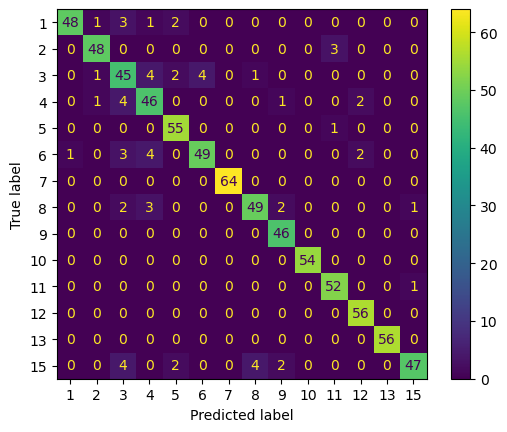

In [20]:
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
report = classification_report(pred_y,y_test)
print(report)
# normalize it to 0-1 
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

# model explainer
## to be continued

SHAP value 
***
$\phi_i(f) = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|!(|N|-|S|-1)!}{|N|!} [f(S \cup \{i\}) - f(S)]$

In [22]:
import shap
shap.initjs()

In [24]:
explainer = shap.KernelExplainer(clf.predict_proba,X_train[:128])

shap_values = explainer.shap_values(X_test[:32])
shap.force_plot(explainer.expected_value[2], shap_values[2], X_test[:32])

Using 128 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/32 [00:00<?, ?it/s]

In [25]:
 shap_values[0]

array([[-0.0003123 ,  0.00761675,  0.00241615, ...,  0.00700682,
         0.00074429, -0.00529153],
       [ 0.        ,  0.01099035,  0.00072299, ..., -0.00136809,
        -0.01092932, -0.08606255],
       [-0.00302084, -0.00653095,  0.00035107, ...,  0.00032099,
        -0.00170977, -0.00837091],
       ...,
       [-0.00078407, -0.0027189 ,  0.00050519, ..., -0.00013395,
        -0.00167589, -0.00518632],
       [-0.00201042, -0.00574314,  0.00126767, ...,  0.00411474,
        -0.00172331, -0.00242468],
       [-0.00256578, -0.01021602, -0.00064616, ...,  0.00044063,
        -0.00448711, -0.00485553]])

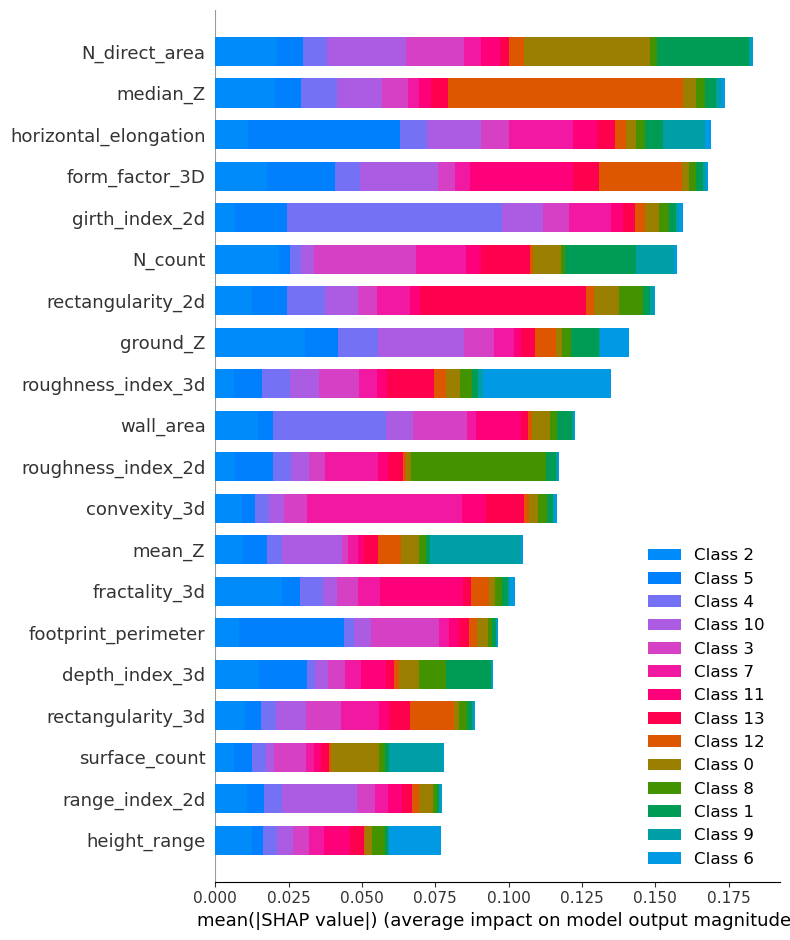

In [28]:
shap.summary_plot(shap_values, data[columns], plot_type="bar")